# Custom Google Trends Reports with Pandas

## Imports

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pytrends
from pytrends.request import TrendReq

In [3]:
pytrends = TrendReq(hl='en-US', tz=360)

# 

### Interest over Time - Bar chart

In [4]:
kw_list = ["Java", "Python", "Javascript"]
pytrends.build_payload(kw_list, geo='')

<AxesSubplot:xlabel='date'>

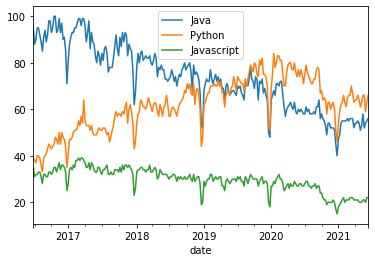

In [5]:
time_interest = pytrends.interest_over_time()
time_interest.plot()

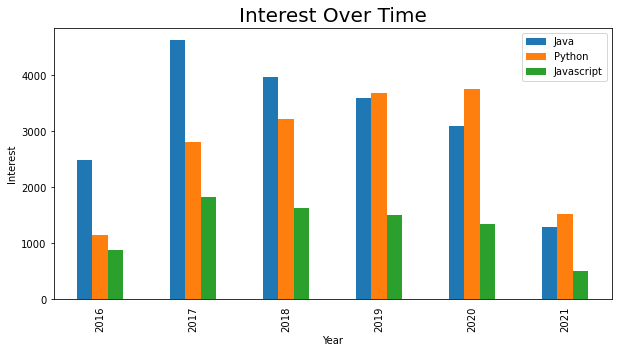

In [6]:
time_interest = time_interest.groupby(pd.Grouper(freq='Y')).sum()

ax = time_interest.plot(kind='bar', xlabel='Year', ylabel="Interest", figsize=(10, 5))
ax.set_xticklabels([pandas_datetime.strftime("%Y") for pandas_datetime in time_interest.index])
ax.set_title('Interest Over Time', fontsize=20)
ax.xaxis.set_ticks_position('none')

In [8]:
ax.figure.savefig('Interest_BarChart.svg', format='svg')

# 

### Interest by Region - Pie chart

In [9]:
kw_list = ["stack overflow"]
pytrends.build_payload(kw_list)
regions = pytrends.interest_by_region()
regions = regions.sort_values(kw_list[0], ascending=False)[:15]
regions.head()

,stack overflow
geoName,
China,100
St. Helena,47
Israel,43
Nepal,38
Sri Lanka,36


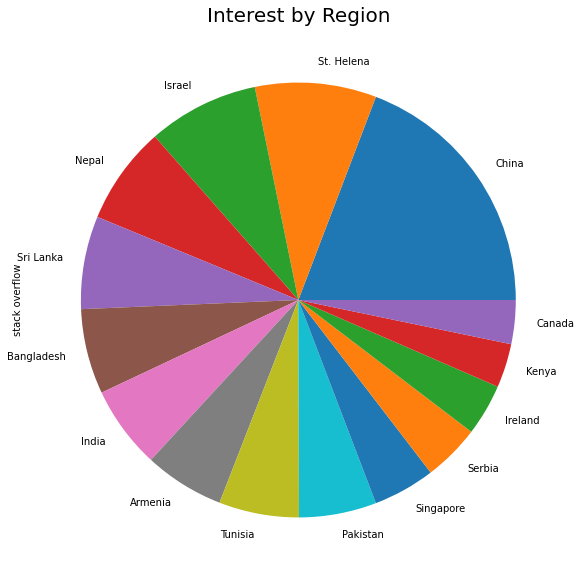

In [10]:
ax = regions.plot(kind = 'pie', figsize=(10, 10), subplots=True, legend=False)
ax = ax.flatten()[0]
ax.set_title('Interest by Region', fontsize=20)
ax.xaxis.set_ticks_position('none')

In [11]:
ax.figure.savefig('RegionInterest_PieChart.svg', format='svg')

# 

### Interest over Time - KDE plot

In [12]:
kw_list = ["Java", "Python", "Javascript"]
pytrends.build_payload(kw_list, cat=0, gprop='')
interest = pytrends.interest_over_time()
interest.head()

,Java,Python,Javascript,isPartial
date,,,,
2016-06-26,95,39,35,False
2016-07-03,88,38,31,False
2016-07-10,90,37,32,False
2016-07-17,95,40,32,False
2016-07-24,95,40,33,False


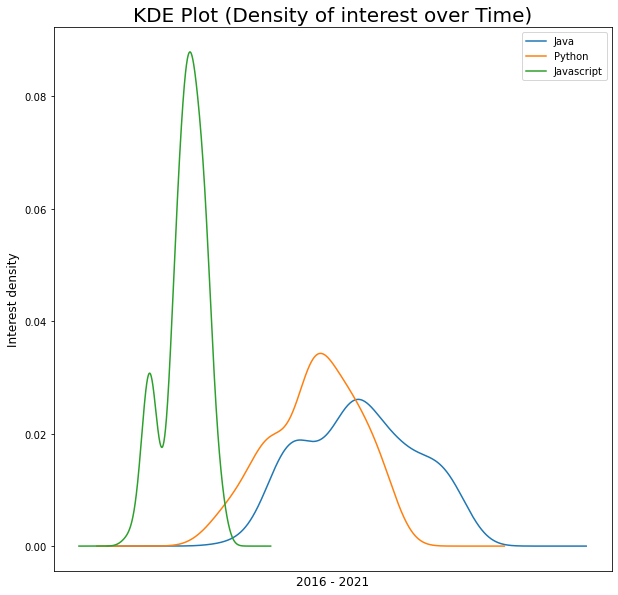

In [13]:
ax = interest.plot(kind='density', figsize=(10, 10))
ax.set_xticks([])

ax.set_title('KDE Plot (Density of interest over Time)', fontsize=20)
ax.set_xlabel('2016 - 2021', fontsize=12)
ax.set_ylabel('Interest density', fontsize=12)
ax.xaxis.set_ticks_position('none')

In [14]:
ax.figure.savefig('Interest_Density.svg', format='svg')